<a href="https://colab.research.google.com/github/mccoymb/AAE-590-DSMM/blob/main/590DSMM_Lecture10_Activity1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import pyMC3 and also arviz for visualisation
import pymc as pm
import arviz as az

In [21]:
# Import the other data science packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from scipy.stats import norm
import statsmodels.formula.api as smf

In [22]:
# Generate data
x, y = datasets.make_regression(n_samples=10_000,
                                n_features=1,
                                noise=10,
                                bias=5)

In [23]:


# Create the dataframe
data = pd.DataFrame(list(zip(x.flatten(), y)),
               columns =['x', 'y'])
data



,x,y
0,-0.244574,-9.934718
1,-1.496130,-91.805425
2,-1.935033,-137.095335
3,0.576215,24.547697
4,-0.589266,-41.574473
...,...,...
9995,-0.125467,-20.785632
9996,1.005577,67.528348
9997,0.726294,44.500943
9998,2.017688,127.987234


In [24]:
# OLS line
formula = 'y ~ x'
results = smf.ols(formula, data=data).fit()
results.params

,0
Intercept,4.978351
x,65.405602


In [25]:
# Get the residuals
results.resid.std()

10.061584784205106

In [26]:
# Get our equation of the OLS line
inter = results.params['Intercept']
slope = results.params['x']
x_vals = np.arange(min(x), max(x), 0.1)
ols_line = inter + slope * x_vals

<ipython-input-26-065ed85ee224>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x_vals = np.arange(min(x), max(x), 0.1)


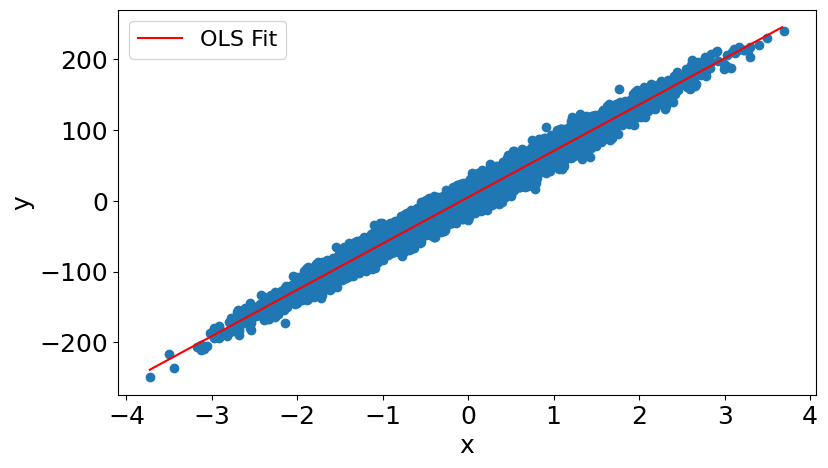

In [27]:


# Plot the target against our feature with the OLS regression
fig, ax = plt.subplots(figsize=(9,5))
ax.scatter(data['x'], data['y'])
ax.plot(x_vals, ols_line,label='OLS Fit', color='red')
ax.ticklabel_format(style='plain')
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16)
plt.savefig('pic.png')
plt.show()



In [28]:
# Start our model
with pm.Model() as model:

    # Define the priors on each parameter:
    grad = pm.Uniform("grad",
                      lower=results.params['x']*0.5,
                      upper=results.params['x']*1.5)

    inter = pm.Uniform("inter",
                       lower=results.params['Intercept']*0.5,
                       upper=results.params['Intercept']*1.5)

    sigma = pm.Uniform("sigma",
                       lower=results.resid.std()*0.5,\
                       upper=results.resid.std()*1.5)

    # Linear regression line
    mean = inter + grad*data['x']

    # Describe the distribution of our conditional output
    y = pm.Normal('y', mu = mean, sigma =  sigma, observed = data['y']) #Changed sd to sigma

    # Run the sampling using pymc3 for 1000 samples
    trace_100 = pm.sample(100,return_inferencedata=True)

Output()

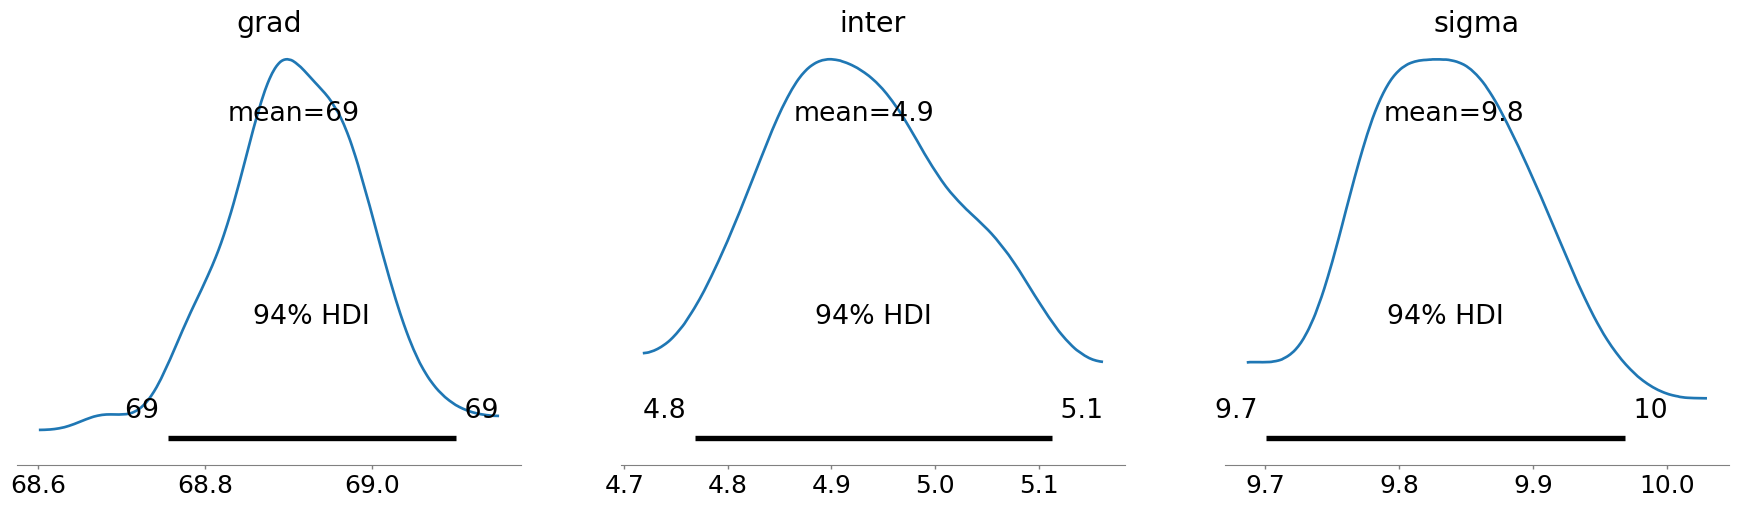

In [16]:
with model:
    az.plot_posterior(trace_100,
                      var_names=['grad', 'inter', 'sigma'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')

In [17]:
# Start our model
with pm.Model() as model:

    # Define the priors on each parameter:
    grad = pm.Uniform("grad",
                      lower=results.params['x']*0.5,
                      upper=results.params['x']*1.5)

    inter = pm.Uniform("inter",
                       lower=results.params['Intercept']*0.5,
                       upper=results.params['Intercept']*1.5)

    sigma = pm.Uniform("sigma",
                       lower=results.resid.std()*0.5,
                       upper=results.resid.std()*1.5)

    # Linear regression line
    mean = inter + grad*data['x']

    # Describe the distribution of our conditional output
    y = pm.Normal('y', mu = mean, sigma = sigma, observed = data['y'])

    # Run the sampling using pymc3 for 10,000 samples
    trace_10_000 = pm.sample(10_000,return_inferencedata=True)

Output()

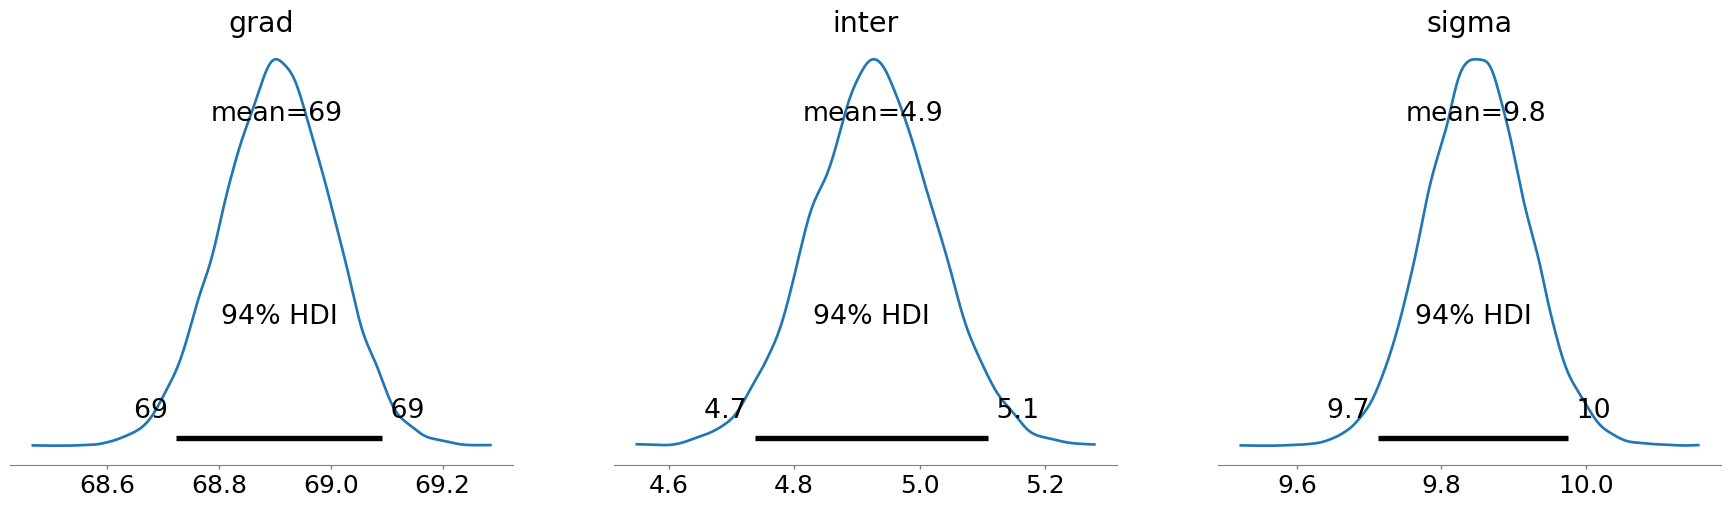

In [18]:
with model:
    az.plot_posterior(trace_10_000,
                      var_names=['grad', 'inter', 'sigma'],
                      textsize=18,
                      point_estimate='mean',
                      rope_color='black')